In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = r"C:\Users\prath\OneDrive\Documents\GreenSkillsAI\archive (1)\DATASET"
train_dir = base_dir + r"\TRAIN"
test_dir = base_dir + r"\TEST"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


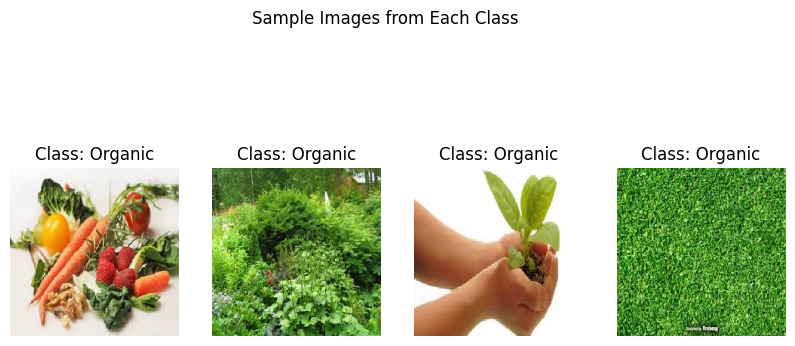

In [3]:
plt.figure(figsize=(10, 5))
for i in range(4):
    image, label = next(train_data)
    plt.subplot(1, 4, i + 1)
    plt.imshow(image[0])
    plt.title("Class: " + ("Organic" if label[0] == 0 else "Recyclable") )
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()

In [4]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
mobilenet_model.trainable = False

model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
history = model.fit (
    train_data,
    validation_data=test_data,
    epochs=2
)

model.save('mobilenet_waste_classifier.h5')

loss, accuracy = model.evaluate(test_data)
print("Model Accuracy:", accuracy)


C:\Users\prath\OneDrive\Documents\GreenSkillsAI\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 735s 1s/step - accuracy: 0.8469 - loss: 0.3401 - val_accuracy: 0.8906 - val_loss: 0.2505
Epoch 2/2
706/706 ━━━━━━━━━━━━━━━━━━━━ 364s 516ms/step - accuracy: 0.9332 - loss: 0.1740 - val_accuracy: 0.8619 - val_loss: 0.3028


79/79 ━━━━━━━━━━━━━━━━━━━━ 36s 457ms/step - accuracy: 0.8582 - loss: 0.3182
Model Accuracy: 0.861918032169342


In [7]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = model.predict(test_data).flatten()
y_pred = (y_pred_prob > 0.5).astype(int) 
y_true = test_data.classes

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['Organic', 'Recyclable']))

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 507ms/step
Classification Report:
               precision    recall  f1-score   support

     Organic       0.56      0.68      0.61      1401
  Recyclable       0.45      0.33      0.38      1112

    accuracy                           0.52      2513
   macro avg       0.50      0.50      0.50      2513
weighted avg       0.51      0.52      0.51      2513

Confusion Matrix:
 [[951 450]
 [747 365]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


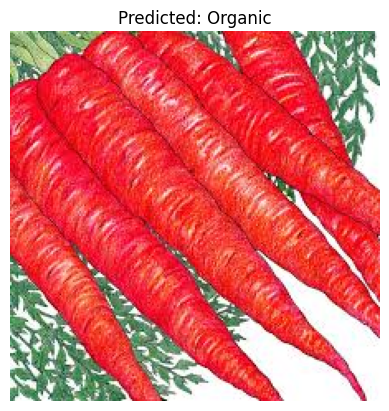

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model_path = 'mobilenet_waste_classifier.h5'
test_image_path = r"C:\Users\prath\OneDrive\Documents\GreenSkillsAI\archive (1)\DATASET\TEST\O\O_12609.jpg"

model = tf.keras.models.load_model(model_path)

test_img = load_img(test_image_path, target_size=(224, 224))
test_img_array = img_to_array(test_img) / 255.0
test_img_array = np.expand_dims(test_img_array, axis=0)

predicted_prob = model.predict(test_img_array)[0][0]
predicted_class = 'Organic' if predicted_prob < 0.5 else 'Non Organic'

plt.imshow(test_img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()